In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
# encoding dimension
encoding_dim = 32
input_img = Input(shape=(784, ))  # 28*28
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
# autoencoder
autoencoder = Model(input_img, decoded)
# encoder
encoder = Model(input_img, encoded)
# decoder
encoded_input = Input(shape=(encoding_dim, ))
decoded_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoded_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
# data load
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
# normalization
x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.
# flatten
x_train_flatten = x_train.reshape((x_train.shape[0], -1))
x_test_flatten = x_test.reshape((x_test.shape[0], -1))
print(x_train_flatten.shape)
print(x_test_flatten.shape)

(60000, 784)
(10000, 784)


In [9]:
encoded_imgs = encoder.predict(x_test_flatten)
decoded_imgs = decoder.predict(encoded_imgs)
# for testing decoded_imgs matched valid_imgs
valid_imgs = autoencoder.predict(x_test_flatten)

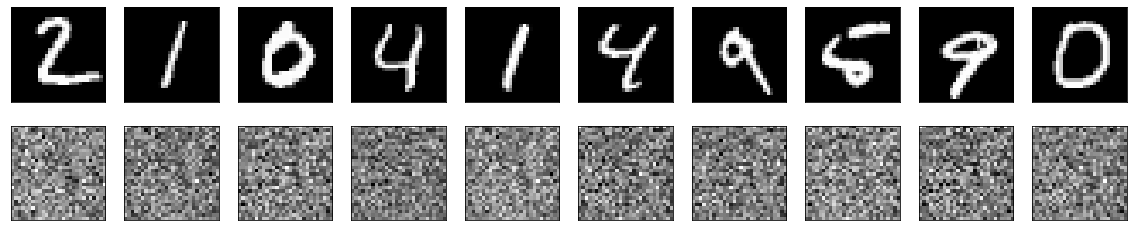

In [10]:
import matplotlib.pyplot as plt

n = 10  # 이미지 갯수
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # 원본 데이터
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_flatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # 재구성된 데이터
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()